In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

sns.set_theme(palette='colorblind')

In [2]:
rice_data = arff.loadarff('Rice_Cammeo_Osmancik.arff')

In [3]:
rice_df = pd.DataFrame(rice_data[0])

In [4]:
rice_df.head(1)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'


In [5]:
catCols = [col for col in rice_df.columns if rice_df[col].dtype=="O"]

In [6]:
rice_df[catCols] = rice_df[catCols].apply(lambda x: x.str.decode('utf8'))

In [7]:
rice_df.to_csv('rice.csv', index=False)

In [8]:
rice_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo


This data pertains to the features observed from two different species of rice (Cammeo and Osmancik).

In [9]:
feature_vars = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']
target_var = 'Class'

The classification task is to predict whether the species of a rice sample is Cammeo or Osmancik based on the given features.

In [10]:
print(rice_df[feature_vars].describe())

               Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3810.000000  3810.000000        3810.000000        3810.000000   
mean   12667.727559   454.239180         188.776222          86.313750   
std     1732.367706    35.597081          17.448679           5.729817   
min     7551.000000   359.100006         145.264465          59.532406   
25%    11370.500000   426.144753         174.353855          82.731695   
50%    12421.500000   448.852493         185.810059          86.434647   
75%    13950.000000   483.683746         203.550438          90.143677   
max    18913.000000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3810.000000   3810.000000  3810.000000  
mean       0.886871  12952.496850     0.661934  
std        0.020818   1776.972042     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872402  11626.250000     0.598862  
50%        0.889050  12706.500000     0

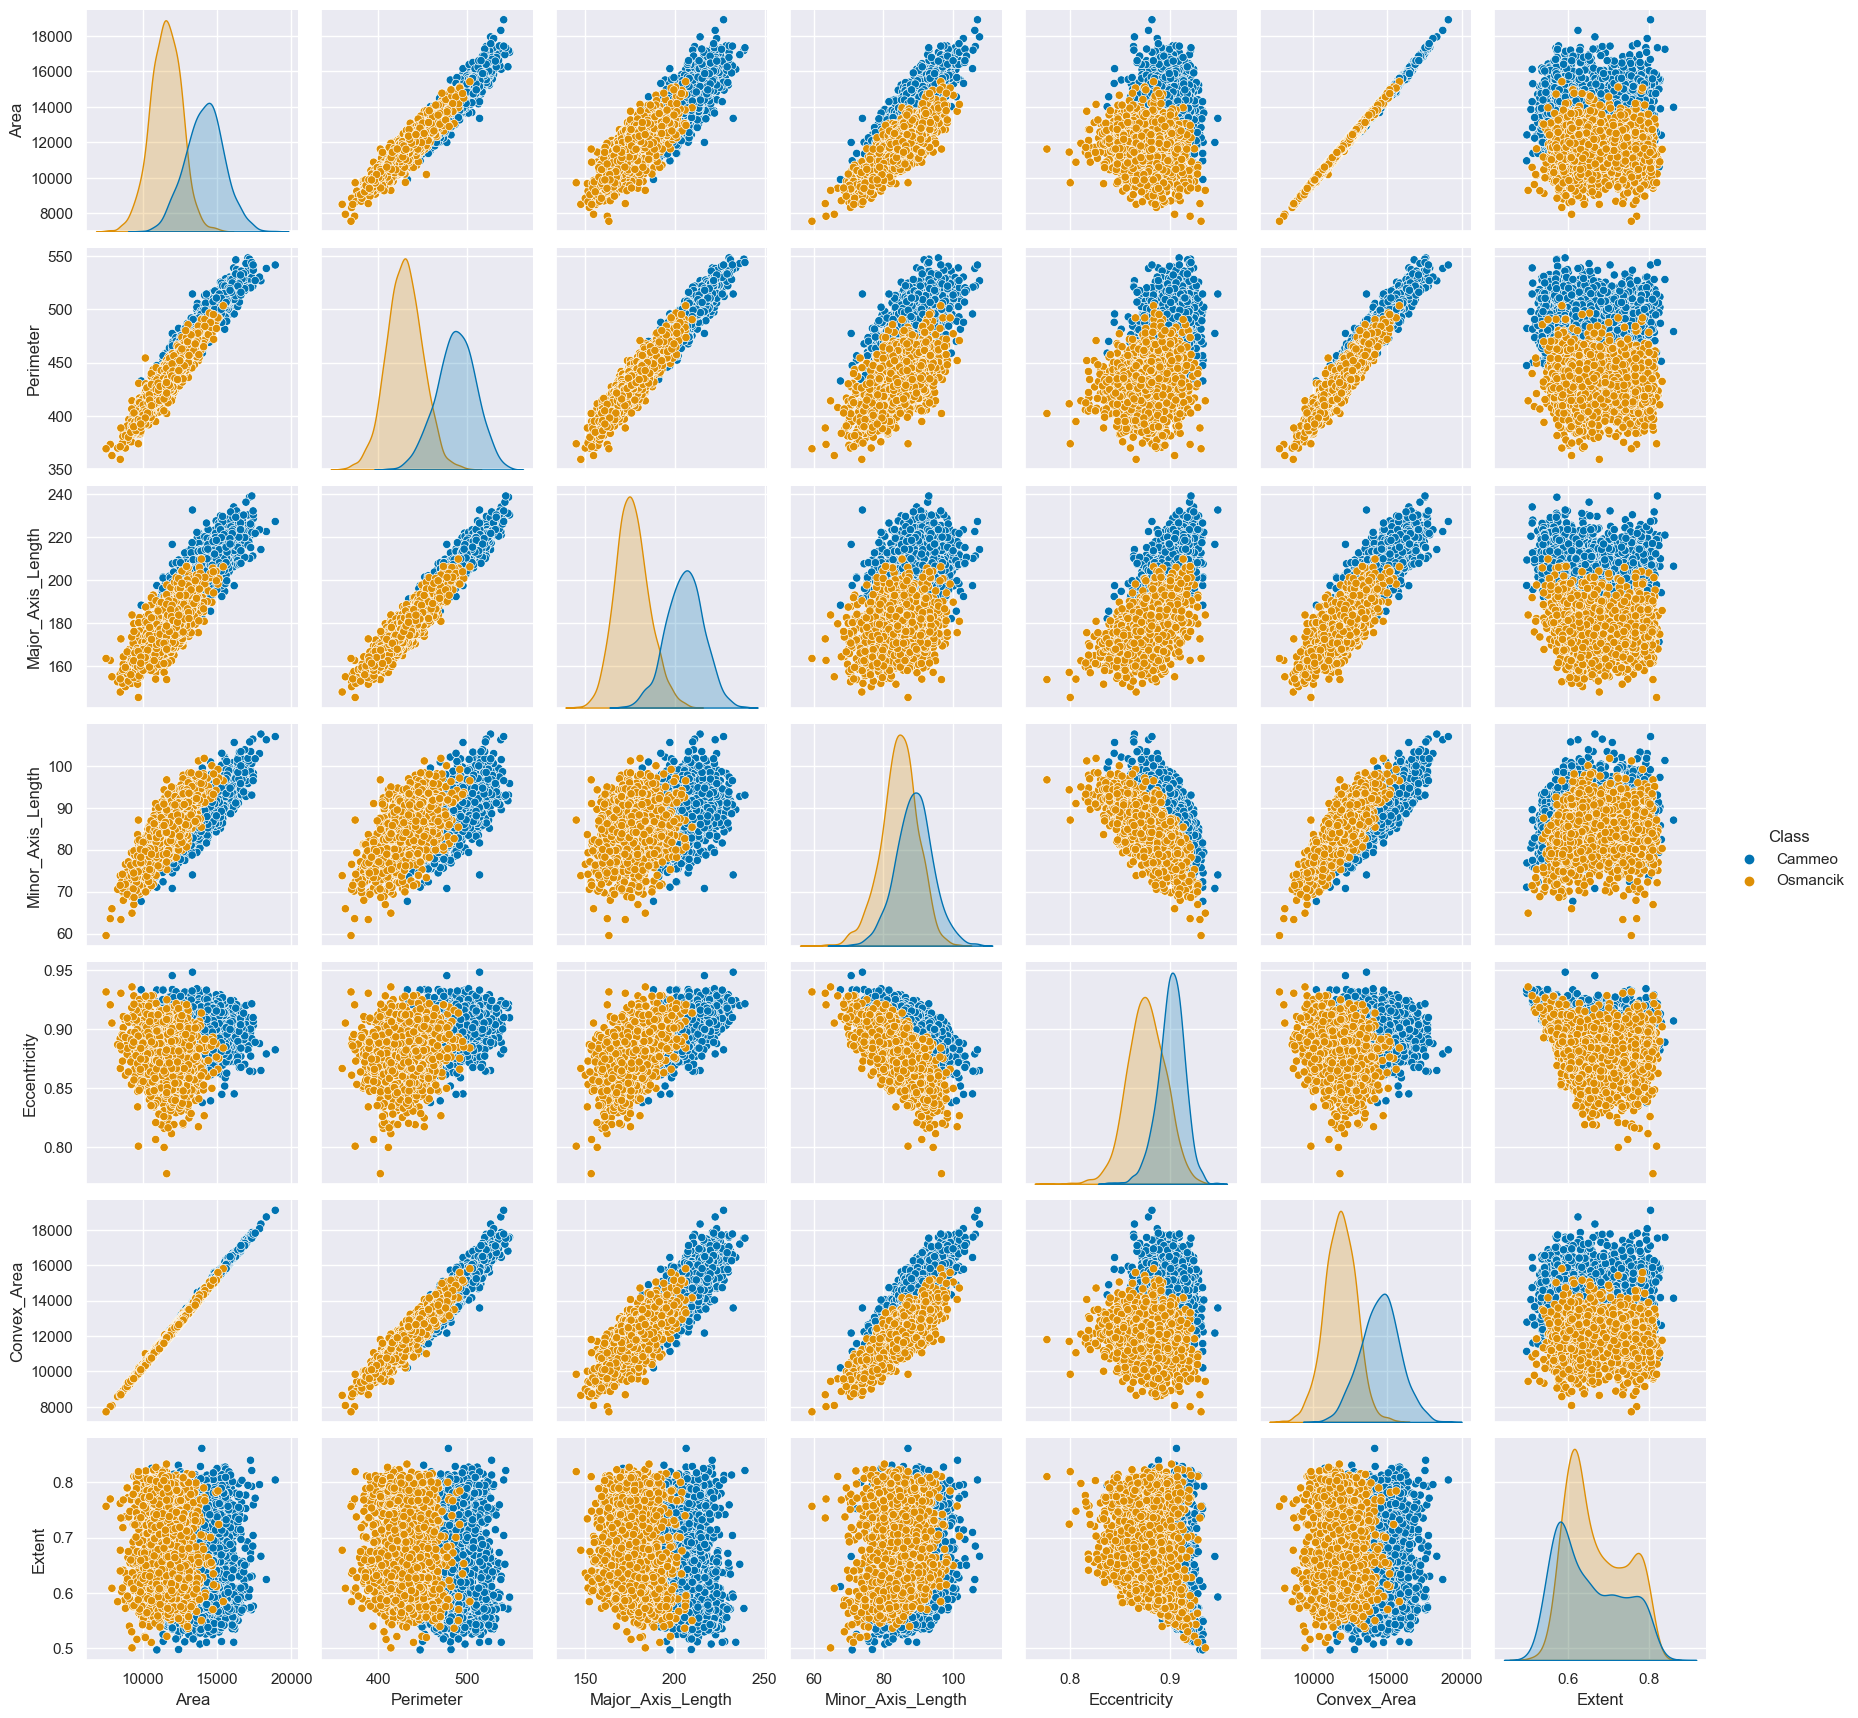

In [11]:
sns.pairplot(data = rice_df, hue=target_var)

Here we can observe the relationship between the feature variables and the target variable. It looks like there are some clear feature distinctions between the two species, therefore I expect the classification to get a high accuracy.

The Naive Bayes classification assumes that these features act independently of one another. I predict that a decision tree classification will produce more accurate results as it is a more discriminative model.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(rice_df[feature_vars],rice_df[target_var],random_state=3)

In [13]:
gnb = GaussianNB()

In [14]:
gnb.fit(X_train,y_train)

GaussianNB()

In [15]:
y_pred = gnb.predict(X_test)

In [16]:
gnb.score(X_test, y_test)

0.9160545645330536

Naive Bayes classification results:

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.92      0.88      0.90       400
    Osmancik       0.91      0.94      0.93       553

    accuracy                           0.92       953
   macro avg       0.92      0.91      0.91       953
weighted avg       0.92      0.92      0.92       953



In [18]:
dt = tree.DecisionTreeClassifier()

In [19]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = dt.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.89      0.86      0.88       400
    Osmancik       0.90      0.92      0.91       553

    accuracy                           0.90       953
   macro avg       0.90      0.89      0.90       953
weighted avg       0.90      0.90      0.90       953



In [22]:
dt.score(X_test, y_test)

0.8982161594963274

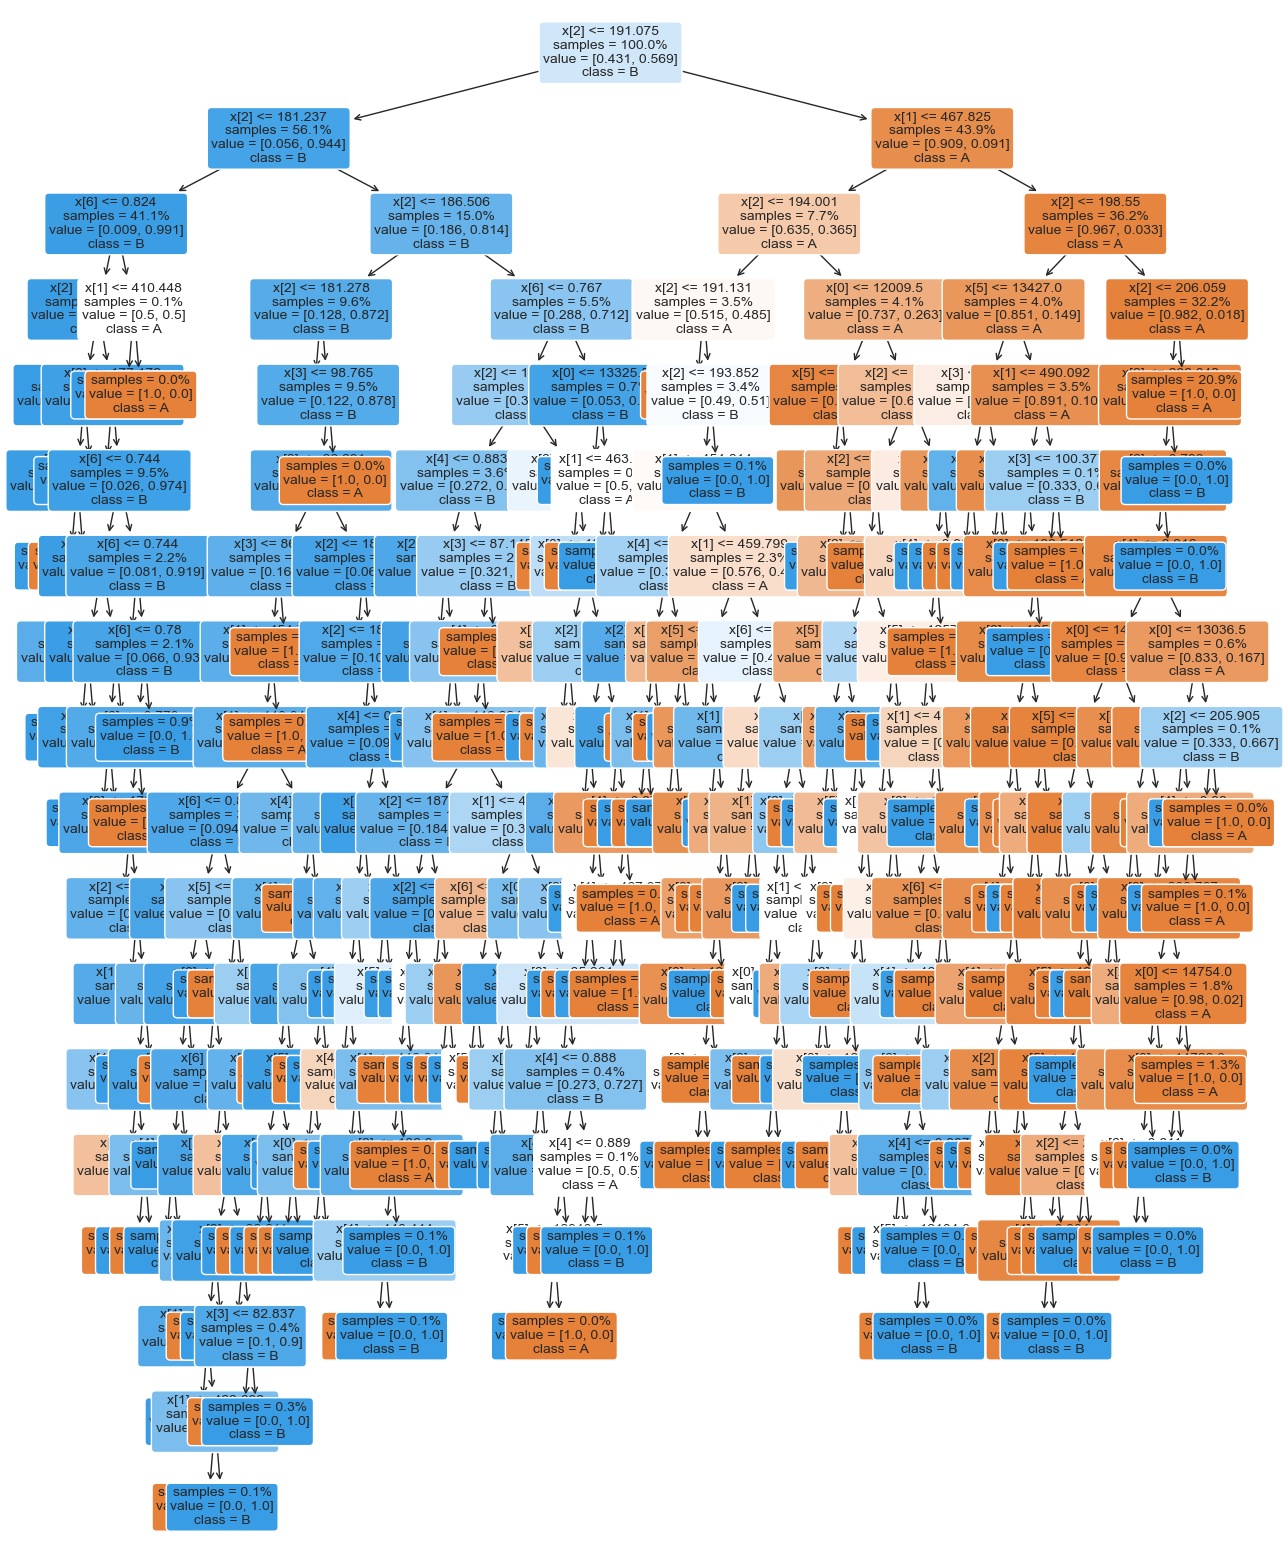

In [23]:
plt.figure(figsize=(15,20))
tree.plot_tree(dt, rounded =True, class_names = ['A','B'],
      proportion=True, filled =True, impurity=False,fontsize=10);

Not very interpretable ↑

Unexpectedly, it appears the Naive Bayes classification performed slighly better than the Decision Tree classification.

A more complex model may produce more accurate results however, complexity does not always equate to higher accuracy, as demonstrated here.

A 92% success rate may be deemed good enough for real world application but whether that is true or not is context-dependent.

I would be cautious to fully rely on this algorithm to distinguish between two rice samples.

I think that this task is achievable through machine learning, as members of a species can typically be identified from a set of unique features.